# IBM Assignment 4

## Problem Statement: Abalone Age Prediction

### Description:- 
You own the mall and want to understand the customers who can quickly
converge [Target Customers] so that the insight can be given to the
marketing team and plan the strategy accordingly.

### Perform the below Tasks to complete the assignment:-
### Clustering the data and performing classification algorithms
1. Download the dataset: Dataset
2. Load the dataset into the tool.
3. Perform Below Visualizations.
● Univariate Analysis
● Bi-Variate Analysis
● Multi-Variate Analysis
4. Perform descriptive statistics on the dataset.
5. Check for Missing values and deal with them.
6. Find the outliers and replace them outliers
7. Check for Categorical columns and perform encoding. 
8. Scaling the data
9. Perform any of the clustering algorithms
10. Add the cluster data with the primary dataset
11. Split the data into dependent and independentvariables.
12. Split the data into training and testing
13. Build the Model
14. Train the Model
15. Test the Model
16. Measure the performance using Evaluation Metrics.

## Solution

### 1. Download the dataset: Dataset

### The dataset has been downloaded.

### 2. Load the dataset

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor

In [2]:
# Loading the dataset
df=pd.read_csv('Mall_Customers.csv')

In [3]:
# Checking dataset
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# Checking the shape of dataset
df.shape 

(200, 5)

In [5]:
# Getting a sample from df
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
169,170,Male,32,87,63
197,198,Male,32,126,74
114,115,Female,18,65,48
198,199,Male,32,137,18
25,26,Male,29,28,82
162,163,Male,19,81,5
71,72,Female,47,49,42
137,138,Male,32,73,73
106,107,Female,66,63,50
60,61,Male,70,46,56


### The dataset has been loaded.

### 3. Perform Below Visualizations. 

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

#### ● Univariate Analysis

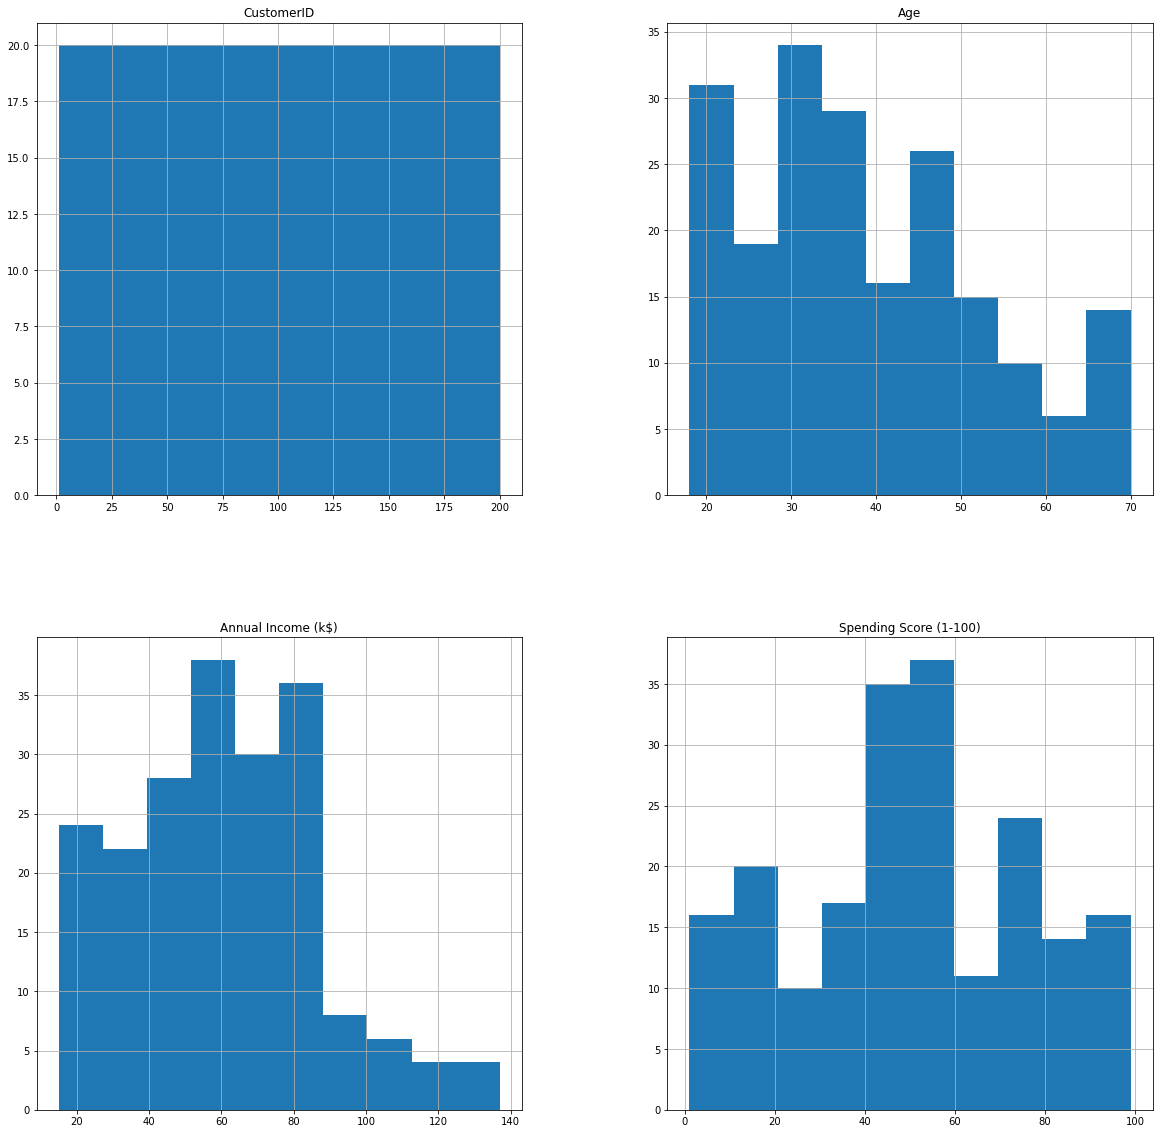

In [7]:
# Visualization of features to check the spread of data:
fig = df.hist(figsize = (20,20))

#### ● Bi - Variate Analysis

In [8]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
col=['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

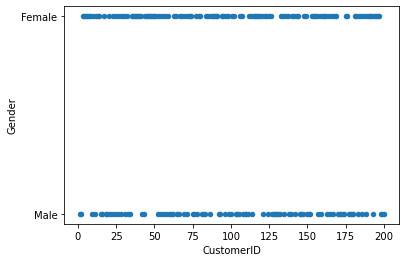

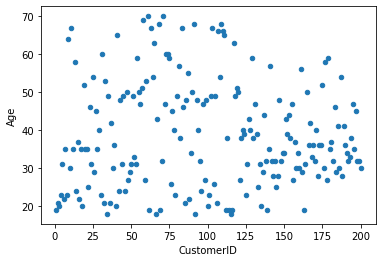

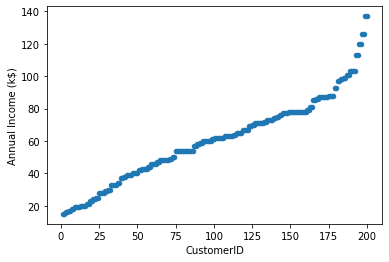

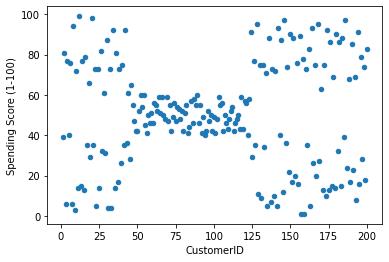

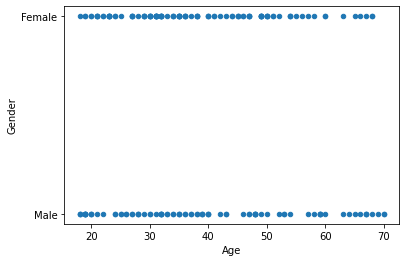

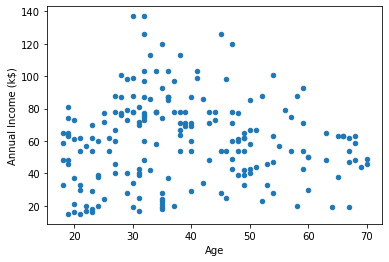

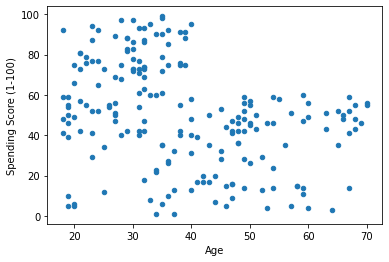

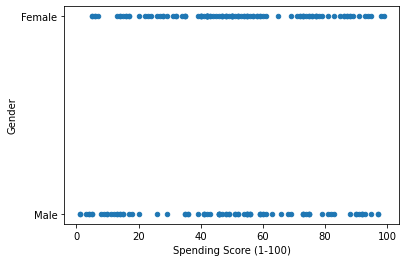

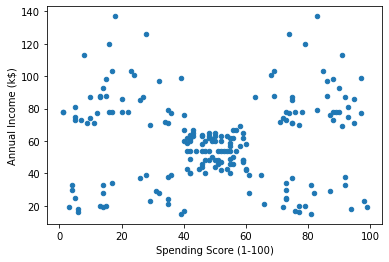

In [10]:
for i in col:
    col.remove(i)
    for k in col:
        df.plot(x=i, y=k, kind='scatter')
        plt.show()

#### ● Multi - Variate Analysis

In [11]:
# Getting the data correlation
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

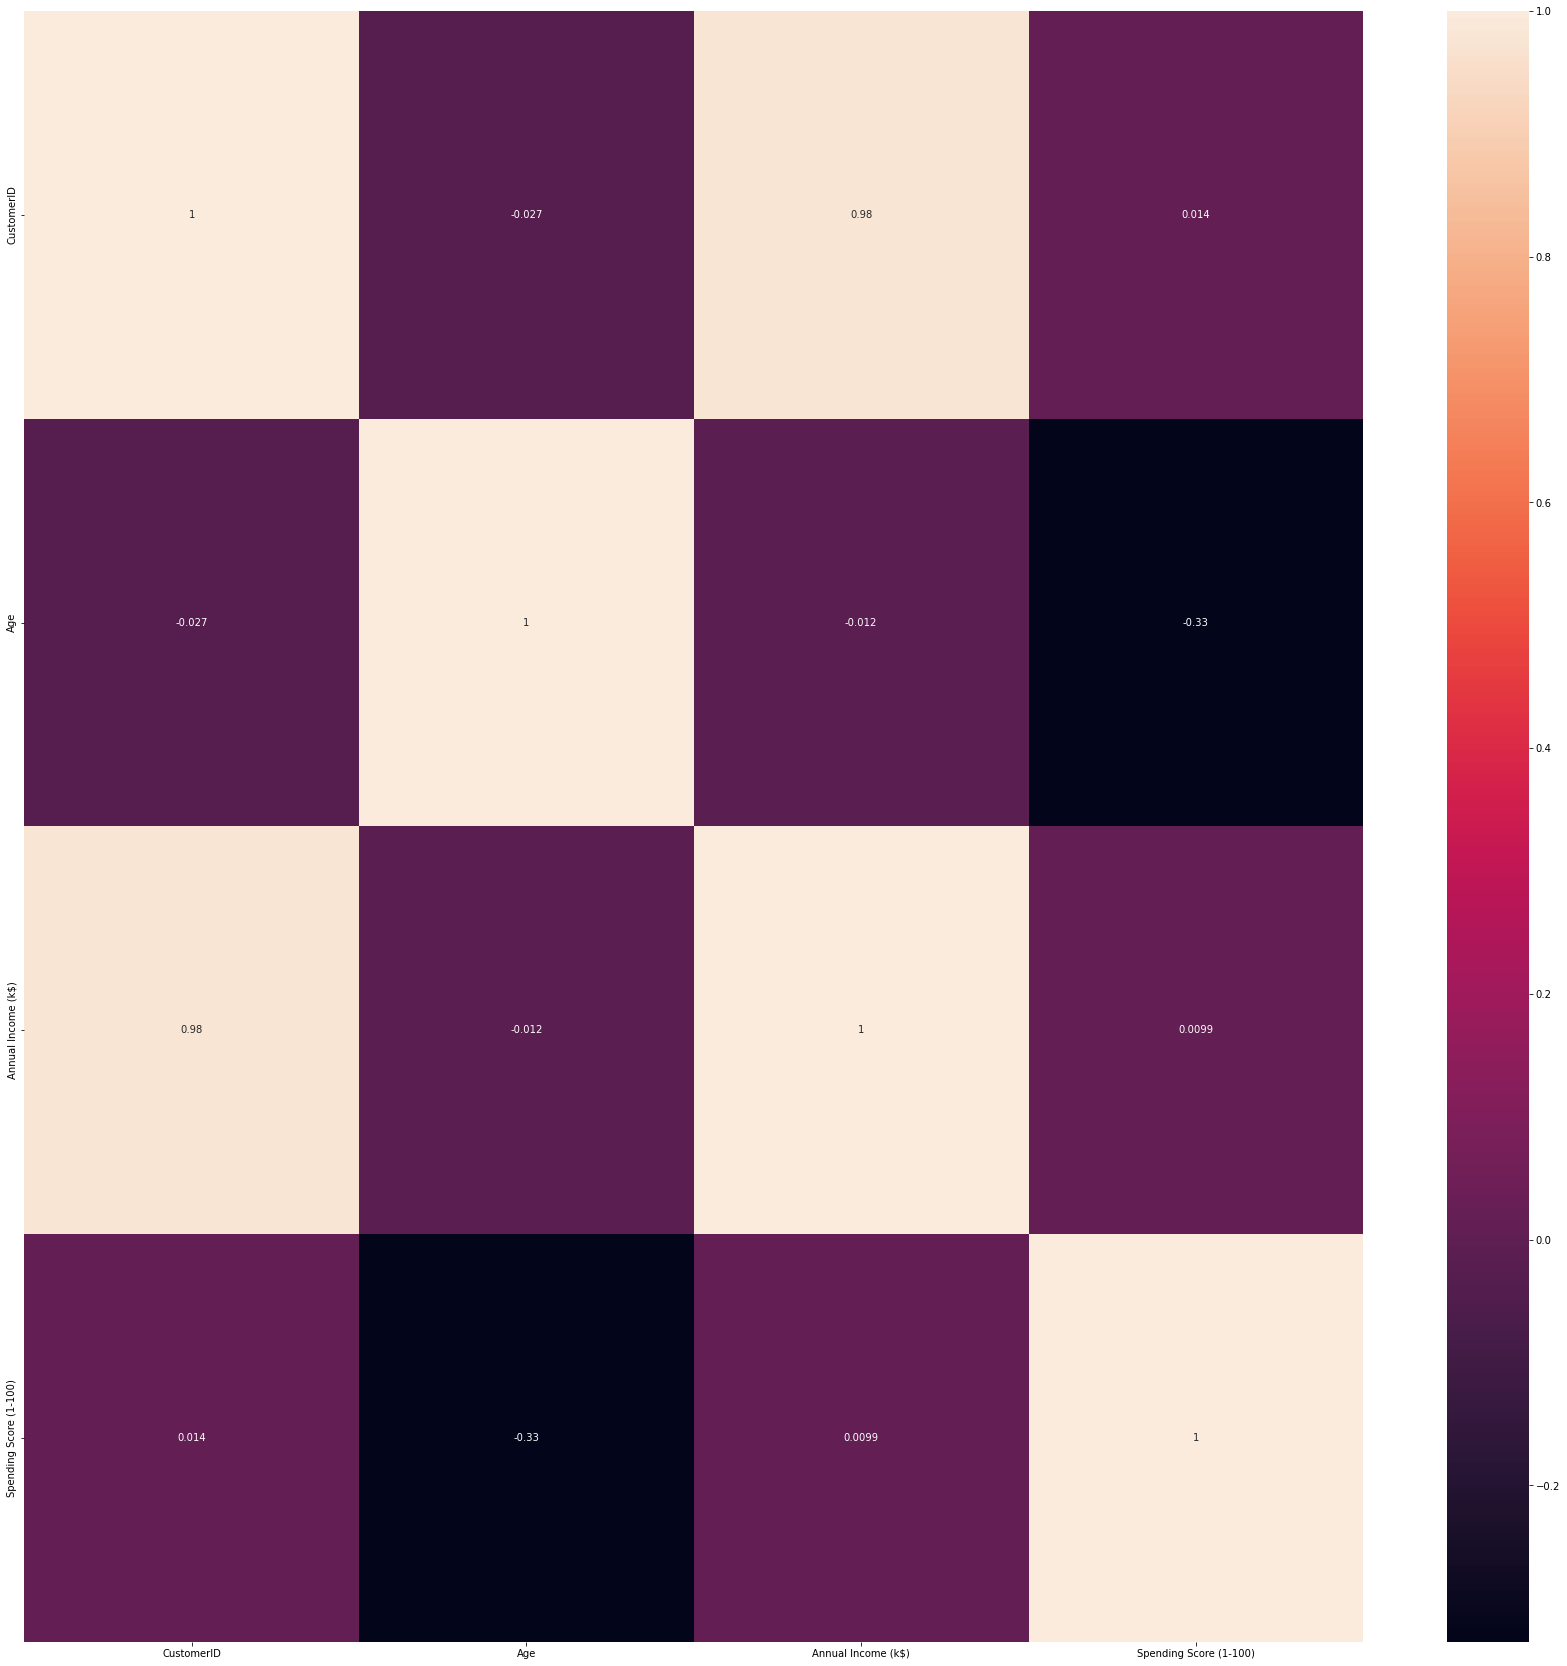

In [12]:
# Visualization of data correlation using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

### The dataset has an unique form of correlation between the attributes.

### All visualizations have been performed.

### 4. Perform descriptive statistics on the dataset.

In [13]:
# Getting detail on the feature of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
# Descriptive statistical analysis on continous attributes
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
# Descriptive statistical analysis on continous & catagorical attributes
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


### Descriptive statistical analysis on the dataset has been performed.

### 5. Handle the Missing values.

<AxesSubplot:>

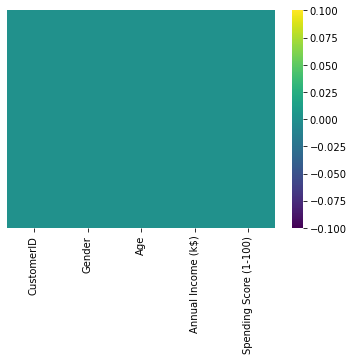

In [16]:
# Checking visually for missing values
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [17]:
# Checking for missing values
for i in df.columns:
    print(i,'=',df[i].isnull().sum(),df[i].dtype)

CustomerID = 0 int64
Gender = 0 object
Age = 0 int64
Annual Income (k$) = 0 int64
Spending Score (1-100) = 0 int64


### There are no missing values in the dataframe.

### 6. Find the outliers and replace the outliers

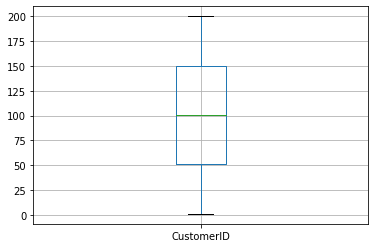

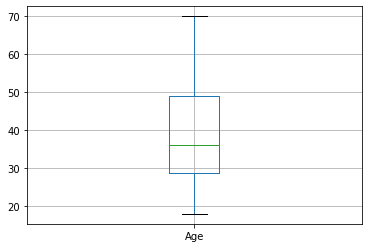

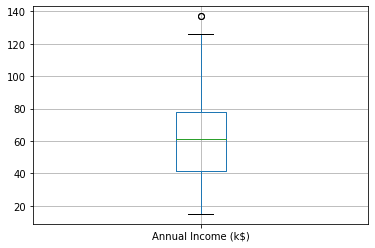

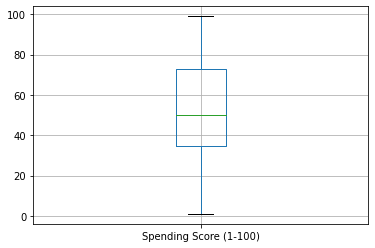

In [18]:
# Checking for Outliers via visualization:
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        plt.figure()
        df.boxplot([col])
        plt.show()

In [19]:
# Dealing with Outliers:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

df=cap_data(df)

capping the  CustomerID
capping the  Gender
capping the  Age
capping the  Annual Income (k$)
capping the  Spending Score (1-100)


C:\Users\roshs\AppData\Local\Temp/ipykernel_5232/1692076479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\roshs\AppData\Local\Temp/ipykernel_5232/1692076479.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\roshs\AppData\Local\Temp/ipykernel_5232/1692076479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

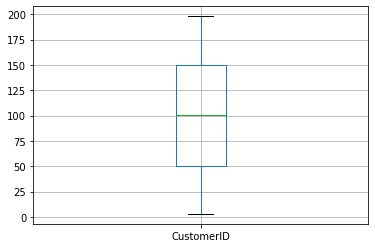

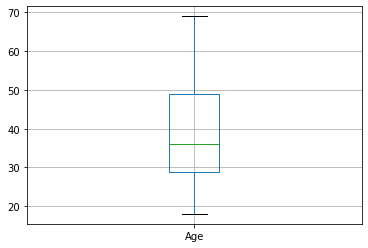

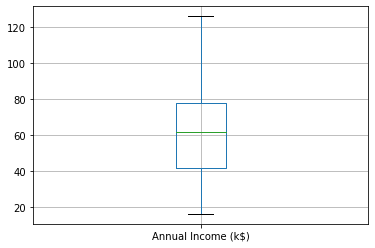

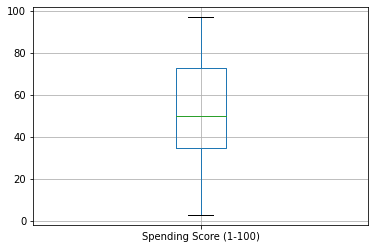

In [20]:
# Rechecking for Outliers via visualization:
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        plt.figure()
        df.boxplot([col])
        plt.show()

### All the outliers have been checked and treated.

### 7. Check for Categorical columns and perform encoding.

In [21]:
# Checking for unique values in catagorical feature/column
catlist=[]
for col in df.columns:
    if df[col].dtype=='object':
        catlist.append(col)
        print(col,'=',df[col].nunique())

Gender = 2


In [22]:
# Checking for unique values other interesting columns
for col in catlist:
    x=df[col].nunique()
    print("Count of Unique Values in", col, " :",x)

Count of Unique Values in Gender  : 2


In [23]:
# Label Encoding on Catagorical columns:
df_encoded=df.copy()
lben=LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype=='object':
        df_encoded[col]=df_encoded[col].astype('category')
        df_encoded[col]=lben.fit_transform(df_encoded[col])
df_encoded.head()
# Encoding done.

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,2.99,1,19.0,15.99,39.0
1,2.99,1,21.0,15.99,81.0
2,3.00,0,20.0,16.00,6.0
3,4.00,0,23.0,16.00,77.0
4,5.00,0,31.0,17.00,40.0


In [24]:
# Getting information on the dataset
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    float64
 1   Gender                  200 non-null    int32  
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    float64
dtypes: float64(4), int32(1)
memory usage: 7.2 KB


### All catagorical attributes/columns are treated and encoded to be numerical.

### 8. Scaling the data

In [25]:
# Seperating Variables
x=df_encoded.drop(labels=['CustomerID'],axis=1)

In [26]:
# With Standard Scaling
ss = StandardScaler()
X_ss=ss.fit_transform(x)

In [27]:
df_Scaled=pd.DataFrame(data=X_ss,columns=x.columns)

In [28]:
df_Scaled

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.426090,-1.718037,-0.436087
1,1.128152,-1.282331,-1.718037,1.198524
2,-0.886405,-1.354210,-1.717651,-1.720424
3,-0.886405,-1.138573,-1.717651,1.042847
4,-0.886405,-0.563540,-1.679018,-0.397168
...,...,...,...,...
195,-0.886405,-0.276023,2.300155,1.120685
196,-0.886405,0.442768,2.531952,-0.864199
197,1.128152,-0.491661,2.531952,0.926089
198,1.128152,-0.491661,2.536201,-1.253392


### The data has been scaled

### 9. Perform any of the clustering algorithms

In [31]:
# create a list for different values of K
n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters :
    cluster = KMeans (n_clusters= K)
    predict = cluster.fit_predict(df_Scaled)
    
    score = silhouette_score(df_Scaled, predict)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.2516587236379403)
For n_clusters = 3, silhouette score is 0.2592026627625005)
For n_clusters = 4, silhouette score is 0.30133812406633476)
For n_clusters = 5, silhouette score is 0.3171515026551504)
For n_clusters = 6, silhouette score is 0.3275583109286761)
For n_clusters = 7, silhouette score is 0.3598592084830587)
For n_clusters = 8, silhouette score is 0.367539075789944)
For n_clusters = 9, silhouette score is 0.40354828504496487)
For n_clusters = 10, silhouette score is 0.4226799852660804)
For n_clusters = 11, silhouette score is 0.43291203124309086)
For n_clusters = 12, silhouette score is 0.4282256346571426)
For n_clusters = 13, silhouette score is 0.42476768647688656)
For n_clusters = 14, silhouette score is 0.42016116114972285)
For n_clusters = 15, silhouette score is 0.4062600560197952)
For n_clusters = 16, silhouette score is 0.40902804003349985)


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


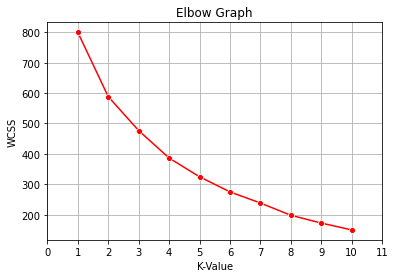

In [33]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(df_Scaled)
    wcss.append(kmeans.inertia_)
plt.grid()
sns.lineplot(x=range(1,11), y=wcss, color="red", marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(11.5))
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()

In [34]:
# building a K-Means model for K = 6
model = KMeans(n_clusters= 11)

# fit the model
model.fit(df_Scaled)

KMeans(n_clusters=11)

### Clustering of the Datahas been done

### 10. Add the cluster data with the primary dataset

In [44]:
data_output = df_encoded.copy(deep = True)
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
data_output['Cluster'] = model.labels_

# head() to display top five rows
data_output.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,2.99,1,19.0,15.99,39.0,10
1,2.99,1,21.0,15.99,81.0,10
2,3.00,0,20.0,16.00,6.0,7
3,4.00,0,23.0,16.00,77.0,9
4,5.00,0,31.0,17.00,40.0,7


In [45]:
# 'return_counts = True' gives the number observation in each cluster
np.unique(model.labels_, return_counts=True)   

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([18, 24, 19, 26, 13, 21, 26, 14, 14, 14, 11], dtype=int64))

### 11. Split the data into dependent and independent variables.

In [46]:
# Seperating Independent and Dependent Variables
x=data_output.drop(labels=['Cluster'],axis=1)
y=data_output['Cluster']

### The data has been splited into dependent and independent variables

### 12. Split the data into training and testing

In [47]:
# Seperating Training and Testing Data for Model Building
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.15)

### The data has been splitted into training and testing data.

### 13. Build the Model


In [48]:
# Linear Regression Model Build
lr=LinearRegression()
# Ridge Regression Model Build
rr=Ridge()
# Lasso Regression Model Build
lc=LassoCV()
# Decision Tree Regression Model Build
dt=DecisionTreeRegressor()
# Random Forest Regression Model Build
rf=RandomForestRegressor()
# K - Nearest Neighbors Regression Model Build
kn=KNeighborsRegressor()
# Support Vector Machines Regression Model Build
sv=SVR()
# Gaussian Process Regression Model Build
gr=GaussianProcessRegressor()

### All Regression models were build for modelling

### 14. Train the Model
### 15. Test the Model
### 16. Measure the performance using Metrics

In [49]:
model_list=[lr,rr,lc,dt,rf,kn,sv,gr]

In [50]:
def get_score(model_list):
    for i in model_list:
        print(i)
        i.fit(x_train,y_train)
        tr=i.score(x_train,y_train)
        print('Train Score:',tr)
        te=i.score(x_test,y_test)
        print('Test Score: ',te)

In [51]:
get_score(model_list)

LinearRegression()
Train Score: 0.31217894276115843
Test Score:  0.2507904960377152
Ridge()
Train Score: 0.31212372513434994
Test Score:  0.2476340108687256
LassoCV()
Train Score: 0.3093925908869094
Test Score:  0.2269311612630761
DecisionTreeRegressor()
Train Score: 1.0
Test Score:  0.6743322382516783
RandomForestRegressor()
Train Score: 0.9897293339325706
Test Score:  0.8820984145122125
KNeighborsRegressor()
Train Score: 0.6673761026219168
Test Score:  0.4249392943865161
SVR()
Train Score: 0.3785225253655695
Test Score:  0.17530601662792322
GaussianProcessRegressor()
Train Score: 1.0
Test Score:  -2.659190195299801


### The Models were Trained, Tested & their performance was tested using Metrices

## Among the above used models, RandomForestRegressor is comparatively best model which has relatively similar testing & testing scores.

# The Assignment 4 has been completed sucessfully.